# Cat vs Dog Classifier
### (using Trasfer Learning)

> Transfer learning is a machine learning technique where a model trained on one task or dataset is used as a starting point for training a model on a different, but related, task or dataset. Instead of training a model from scratch, transfer learning leverages the knowledge and features learned from the source task or dataset to improve the learning process for the target task.

---

**Install Kaggle Library**

In [1]:
!pip install Kaggle

**Configure the path to Kaggle.json file**

In [11]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

import os

# Create the .kaggle directory
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Copy the kaggle.json file to the .kaggle directory
api_key_content = '{"username":"you_username","key":"your_APIKEY"}'  # Replace with your actual API key from kaggle.json
api_key_path = os.path.join(kaggle_dir, "kaggle.json")
with open(api_key_path, "w") as api_key_file:
    api_key_file.write(api_key_content)

# Set appropriate permissions
os.chmod(api_key_path, 0o600)

**Importing the Dog vs Cat Dataset from Kaggle**

In [13]:
!kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:01<21:51, 649kB/s]
  0%|          | 2.00M/812M [00:02<12:21, 1.15MB/s]
  0%|          | 3.00M/812M [00:02<08:25, 1.68MB/s]
  0%|          | 4.00M/812M [00:02<07:29, 1.89MB/s]
  1%|          | 5.00M/812M [00:03<06:58, 2.02MB/s]
  1%|          | 6.00M/812M [00:03<06:32, 2.15MB/s]
  1%|          | 7.00M/812M [00:04<06:13, 2.26MB/s]
  1%|          | 8.00M/812M [00:04<05:58, 2.35MB/s]
  1%|1         | 9.00M/812M [00:04<05:48, 2.41MB/s]
  1%|1         | 10.0M/812M [00:05<05:34, 2.52MB/s]
  1%|1         | 11.0M/812M [00:05<05:17, 2.64MB/s]
  1%|1         | 12.0M/812M [00:05<05:00, 2.79MB/s]
  2%|1         | 13.0M/812M [00:06<04:49, 2.90MB/s]
  2%|1         | 14.0M/812M [00:06<04:40, 2.99MB/s]
  2%|1         | 15.0M/812M [00:06<04:32, 3.07MB/s]
  2%|1         | 16.0M/812M [00:07<04:37, 3.01MB/s]
  2%|2         | 17.0M/812M [00:07<04:37, 3.01MB/s]
  2%|2         | 18.0M/812M [00:07<04:28, 3.10MB/s]
  2%|2         | 19.0

In [2]:
# !ls

!dir

 Volume in drive E has no label.
 Volume Serial Number is E8E5-6307

 Directory of E:\Source Codes\AIML\CatVsDog Classifier

21-08-2023  15:09    <DIR>          .
21-08-2023  11:05    <DIR>          ..
21-08-2023  11:17    <DIR>          .ipynb_checkpoints
21-08-2023  12:59    <DIR>          catsdata
21-08-2023  14:52         3,749,256 CatVsDog Classification - Transfer Learning - Colaboratory.pdf
21-08-2023  15:08         2,341,425 CatVsDog.pdf
11-12-2019  04:19       851,576,689 dogs-vs-cats.zip
21-08-2023  13:00    <DIR>          dogsdata
21-08-2023  15:09         1,525,769 DogVsCatClassifier.ipynb
21-08-2023  13:04    <DIR>          image resized
21-08-2023  11:05                63 kaggle.json
21-08-2023  11:34            88,903 sampleSubmission.csv
21-08-2023  12:50    <DIR>          test data
21-08-2023  11:34       284,321,224 test1.zip
21-08-2023  13:02    <DIR>          train
21-08-2023  11:34       569,546,721 train.zip
               8 File(s)  1,713,150,050 bytes
          

**Extracting the Zip file**

In [17]:
from zipfile import ZipFile

dataset = 'E:\Source Codes\AIML\CatVsDog Classifier/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Extracting the Compressed Dataset**

In [18]:
from zipfile import ZipFile

dataset = 'E:\Source Codes\AIML\CatVsDog Classifier/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [3]:
import os
path, dirs, files = next(os.walk('E:\Source Codes\AIML\CatVsDog Classifier/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  2000


**Printing the name of the Image files**

In [4]:
file_names = os.listdir('E:\Source Codes\AIML\CatVsDog Classifier/train/')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.155.jpg', 'cat.156.jpg', 'cat.157.jpg', 'cat.158.jpg', 'cat

**Important Note:**
The dataset has a total of 25000 images of cats and dogs. My local machine doesn't have the required power to handle this huge data, and go through it to train the model. So I reduced the dataset to 2000 images, 1000 of cats and dogs respectively, so that I can compute the data, and run the model in my machine in small amout of time with my CPU resources.
While the Google Collab environment is cloud based and has it's seperate RAM, it can handle the large dataset properly.
If your System is powerful enough, you can use the whole dataset of 25000 images for training and testing.

---

## INSTALLING DEPENDENCIES

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

**Displaying example images of a Dog and a Cat**

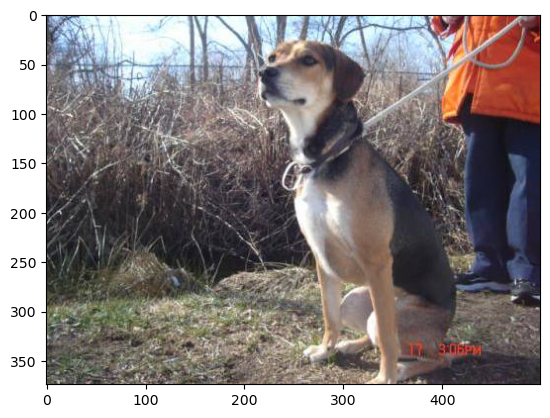

In [6]:
# DOG IMAGE
img = mpimg.imread('E:\Source Codes\AIML\CatVsDog Classifier/train/dog.342.jpg')
imgplt = plt.imshow(img)
plt.show()

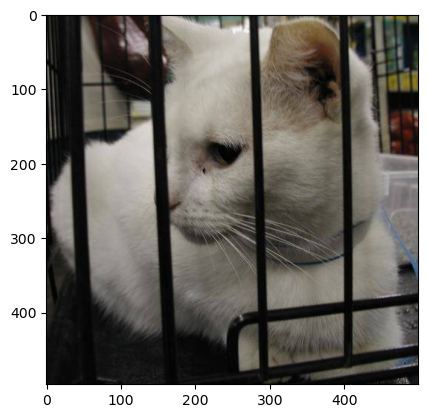

In [7]:
# CAT IMAGE
img = mpimg.imread('E:\Source Codes\AIML\CatVsDog Classifier/train/cat.658.jpg')
imgplt = plt.imshow(img)
plt.show()

In [8]:
file_names = os.listdir('E:\Source Codes\AIML\CatVsDog Classifier/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
cat
cat
cat
cat


**Counting the number of Cats and Dogs (image files)**

In [9]:
file_names = os.listdir('E:\Source Codes\AIML\CatVsDog Classifier/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 1000
Number of cat images = 1000


---

## RESIZING THE IMAGES
- Resizing all the images to 224x224

**Creating a directory for resized images**

In [70]:
os.mkdir('E:\Source Codes\AIML\CatVsDog Classifier/image resized')

In [10]:
original_folder = 'E:\Source Codes\AIML\CatVsDog Classifier/train/'
resized_folder = 'E:\Source Codes\AIML\CatVsDog Classifier/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

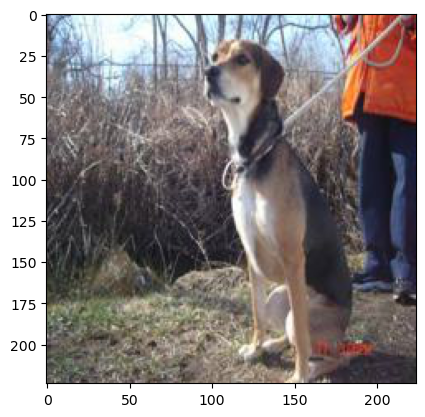

In [11]:
# RESIZED DOG IMAGE
img = mpimg.imread('E:\Source Codes\AIML\CatVsDog Classifier/image resized/dog.342.jpg')
imgplt = plt.imshow(img)
plt.show()

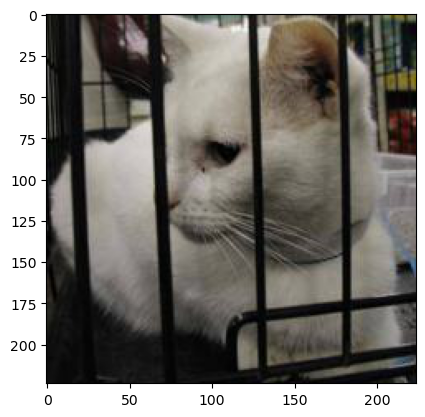

In [12]:
# RESIZED CAT IMAGE
img = mpimg.imread('E:\Source Codes\AIML\CatVsDog Classifier/image resized/cat.658.jpg')
imgplt = plt.imshow(img)
plt.show()

---
**Creating a Label for the Classification**

> 0 = Cat <br>
> 1 = Dog


**ASSIGNING THE LABELS**

In [13]:
filenames = os.listdir('E:\Source Codes\AIML\CatVsDog Classifier/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [14]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
2000


In [15]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


**Counting the number of images of dogs and cats out of 2000 images**

In [16]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


**Converting Resized Images to Numpy arrays**

In [17]:
import cv2
import glob

In [18]:
image_directory = 'E:\Source Codes\AIML\CatVsDog Classifier/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [19]:
print(dog_cat_images)

type(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 202 248]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 202 248]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [181 207 207]
   [168 199 200]
   [161 194 197]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [176 202 202]
   [166 197 200]
   [162 197 200]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [168 194 194]
   [164 195 198]
   [166 201

numpy.ndarray

In [20]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


**Assigning the Labels to X & Y**

In [21]:
X = dog_cat_images
Y = np.asarray(labels)

---
## SPLITTING THE DATASET
**Splitting the Dataset into Training Data and Testing Data**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


training images = 1600

test images = 400

**Scaling the Data**

In [27]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [28]:
print(X_train_scaled)

[[[[0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   ...
   [0.84705882 0.85098039 0.84313725]
   [0.84705882 0.85098039 0.84313725]
   [0.84705882 0.85098039 0.84313725]]

  [[0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   ...
   [0.83529412 0.83921569 0.83137255]
   [0.83529412 0.83921569 0.83137255]
   [0.83529412 0.83921569 0.83137255]]

  [[0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   ...
   [0.82745098 0.83137255 0.82352941]
   [0.82352941 0.82745098 0.81960784]
   [0.82352941 0.82745098 0.81960784]]

  ...

  [[0.74901961 0.75686275 0.76078431]
   [0.74509804 0.75294118 0.75686275]
   [0.73333333 0.74117647 0.74509804]
   ...
   [0.74509804 0.74901961 0.73333333]
   [0.74509804 0.74901961 0.73333333]
   [0.74509804 0.74901961 0.73333333]]

  [[0.76862745 0.77647059 0.78039216]
   [0.7

---
## BUILDING THE NEURAL NETWORK

In [29]:
pip install tensorflow

In [30]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [31]:
import tensorflow as tf
import tensorflow_hub as hub

---

We are using: **tf2-preview/mobilenet_v2/feature_vector** <br>
> [TF2] Feature vectors of images with MobileNet V2 trained on ImageNet (ILSVRC-2012-CLS)

MobileNet V2 is a family of neural network architectures for efficient on-device image classification and related tasks, originally published by

Mark Sandler, Andrew Howard, Menglong Zhu, Andrey Zhmoginov, Liang-Chieh Chen: "Inverted Residuals and Linear Bottlenecks: Mobile Networks for Classification, Detection and Segmentation", 2018.
Mobilenets come in various sizes controlled by a multiplier for the depth (number of features) in the convolutional layers. They can also be trained for various sizes of input images to control inference speed.

This TF-Hub module uses the TF-Slim implementation of mobilenet_v2 with a depth multiplier of 1.0 and an input size of 224x224 pixels.

The module contains a trained instance of the network, packaged to get feature vectors from images. If you want the full model including the classification it was originally trained for, use module google/tf2-preview/mobilenet_v2/classification/4 instead.

In [32]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [33]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

**Trainig the Model**

In [35]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 41s 747ms/step - loss: 0.2283 - acc: 0.9094
Epoch 2/5
50/50 [==============================] - 37s 730ms/step - loss: 0.0754 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 36s 725ms/step - loss: 0.0603 - acc: 0.9806
Epoch 4/5
50/50 [==============================] - 35s 708ms/step - loss: 0.0461 - acc: 0.9812
Epoch 5/5
50/50 [==============================] - 35s 696ms/step - loss: 0.0382 - acc: 0.9887


**Accuracy Score**

In [36]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print(acc*100, "%")

13/13 [==============================] - 10s 726ms/step - loss: 0.0488 - acc: 0.9825
Test Loss = 0.04876649007201195
Test Accuracy = 0.9825000166893005
98.25000166893005 %


---
## THE PREDICTIVE MODEL

Path of the image to be predicted: E:\Source Codes\AIML\CatVsDog Classifier\test data\cat1.jpg
1/1 [==============================] - 0s 465ms/step
[[ 3.9810634 -3.4388103]]
0
The image if of a Cat


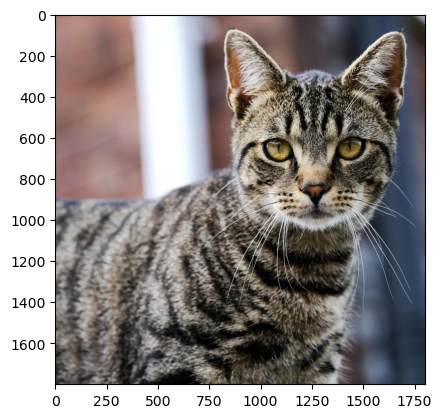

In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# cv2_imshow(input_image)
# cv2_imshow is specific to Google Collab environment

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image if of a Cat')

else:
  print('The image is of a Dog')